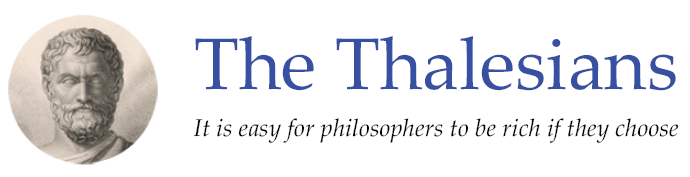

# Lecture 4a: `keras` for written digit recognition

The MNIST database (Modified National Institute of Standards and Technology database) is a large dataset of handwritten digits that is commonly used for training various image processing systems. The dataset is also widely used for training and testing in the field of machine learning

In this lecture we will use `keras` library to construct two types of neural networks in order to classify hand-written digits from MNIST dataset.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.optimizers import RMSprop

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

# load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
plt.imshow(np.array(x_train[0]).reshape(28,28), cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [ ]:
plt.imshow(np.array(x_train[1]).reshape(28,28), cmap='gray')
plt.title('Class '+ str(y_train[1]))

In [ ]:
plt.imshow(np.array(x_train[2]).reshape(28,28), cmap='gray')
plt.title('Class '+ str(y_train[2]))

# Data Cleaning and Normalisation.

Our image data will be fed into neural nets as 28 by 28 pixel images unrolled as vectors, meaning that a single image vector will be of length 784. We then devide each pixel value by 255 (max value of a pixel), which normalises the dataset such that the data points are bound between 0 and 1.

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# On-hot encoding the `y`'s

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Building the Multi-Layer Perceptron Nework

Theoretical underpinnings of NN's are beyond the scope of this course, but it is helpful to think of a neural net as an unparameterised estimator capable of finding non-linear relationships within datasets.

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Convolutional Neural Network

CNNs have become revolutionary tools in computer vision. They are specifically important for the task at hand because they help find "inter-pixel dependencies" and something that MLP network is not quit capable of doing. Again, the theory lies beyond the scope of this course.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
plt.imshow(np.array(x_train[0]).reshape(28,28), cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [ ]:
plt.imshow(np.array(x_test[0]).reshape(28,28), cmap='gray')
plt.title('Class '+ str(y_test[0]))